In [12]:

import numpy as np
import random
from numpy import loadtxt
from scipy.optimize import curve_fit
import os
import matplotlib.pyplot as plt

import scipy.special
from scipy.optimize import fmin
from tqdm import tqdm

# Load data

In [13]:
data = np.loadtxt("./results/critical-atom-numbers/recipe-8-nc/functionals_E_N.dat")
# the header is: a_s  n_c_best_possible_fit  rho_min_x  rho_max_x  alpha  alpha_opt  beta  gamma  min_energy  
# read all data
a_s = data[:,0]
n_c_best_possible_fit = data[:,1]
rho_min_x = data[:,2]
rho_max_x = data[:,3]
alpha = data[:,4]
alpha_opt = data[:,5]
beta = data[:,6]
gamma = data[:,7]

# Take only the data where rho_min_x is smaller than 0.8, and rho_max_x is larger than 2.0
indices = np.where((rho_min_x < 0.7) & (rho_min_x > 0.4) & (rho_max_x > 1.5) & (rho_max_x < 2.5))
a_s = a_s[indices]
n_c_best_possible_fit = n_c_best_possible_fit[indices]
rho_min_x = rho_min_x[indices]
rho_max_x = rho_max_x[indices]
alpha = alpha[indices]
alpha_opt = alpha_opt[indices]
beta = beta[indices]
gamma = gamma[indices]





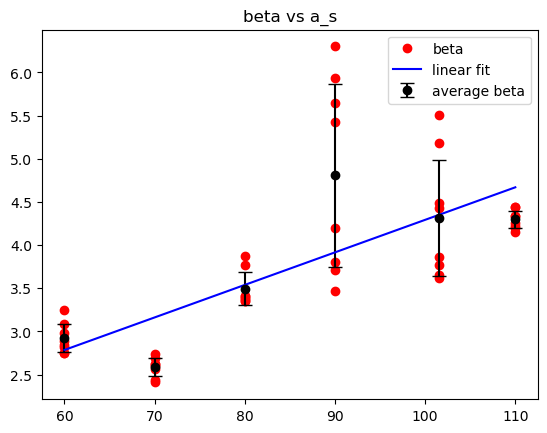

In [14]:
# Plot beta vs a_s
plt.plot(a_s, beta, 'o', label='beta', color='red')
# On the same plot, plot the error bar for each a_s
a_s_unique = np.unique(a_s)
average = np.zeros(len(a_s_unique))
std = np.zeros(len(a_s_unique))
for i in range(len(a_s_unique)):
    average[i] = np.average(beta[a_s==a_s_unique[i]])
    std[i] = np.std(beta[a_s==a_s_unique[i]])
# plot the error bar for each a_s, with larger error bars for a_s with less data points
plt.errorbar(a_s_unique, average, yerr=std, fmt='o', label='average beta', capsize=5, color='black')
# Make a linear fit of the average beta vs a_s
def func_beta(x, a, b):
    return a*x + b
popt_beta, pcov = curve_fit(func_beta, a_s_unique, average)
plt.plot(a_s_unique, func_beta(a_s_unique, *popt_beta), label='linear fit', color='blue')
plt.title("beta vs a_s")
plt.legend(loc='best')

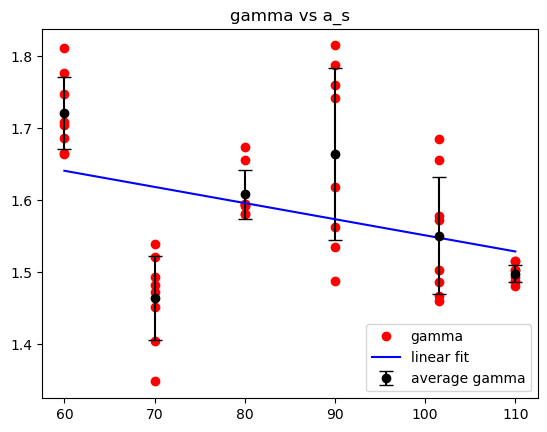

In [15]:
# Plot gamma vs a_s
plt.plot(a_s, gamma, 'o', label='gamma', color='red')
# On the same plot, plot the error bar for each a_s
a_s_unique = np.unique(a_s)
average = np.zeros(len(a_s_unique))
std = np.zeros(len(a_s_unique))
for i in range(len(a_s_unique)):
    average[i] = np.average(gamma[a_s==a_s_unique[i]])
    std[i] = np.std(gamma[a_s==a_s_unique[i]])
# plot the error bar for each a_s, with larger error bars for a_s with less data points
plt.errorbar(a_s_unique, average, yerr=std, fmt='o', label='average gamma', capsize=5, color='black')
# Make a linear fit of the average gamma vs a_s
def func_gamma(x, a, b):
    return a*x + b
popt_gamma, pcov = curve_fit(func_gamma, a_s_unique, average)
plt.plot(a_s_unique, func_gamma(a_s_unique, *popt_gamma), label='linear fit', color='blue')
plt.title("gamma vs a_s")
plt.legend(loc='best')

# Estimate $n_c$ for each $a_s$ value, using fits


In [5]:
from estimate_nc.estimate_nc import estimate_nc, en_per_particle

In [8]:
a_s = np.linspace(60, 110, 50)
r_0 = 387.6   # https://www.wolframalpha.com/input?i=%28162Dy+mass%29+*+%28mu_0%29+*+%289.93+bohr+magneton%29%5E2+%2F+%284+pi+hbar%5E2%29+%2F+%28bohr+radius%29
# for each a_s, find the best possible fit for n_c, using the fits func_beta and func_gamma
n_c_best_possible_fit = np.zeros(len(a_s))
for i in tqdm(range(len(a_s))):
    alpha = 2*np.pi*(a_s[i]/r_0) # * (1 - 1 / (3*(a_s / r_0)))
    n_c_best_possible_fit[i] = estimate_nc(alpha,func_beta(a_s[i], *popt_beta), func_gamma(a_s[i], *popt_gamma), based_on="size")[0]


  0%|          | 0/50 [00:00<?, ?it/s]

nparticles: 285000.0, sr_local_min: [18.52765531 18.12705411 17.72645291 17.3258517  16.9252505  16.5246493
 16.1240481  15.72344689 15.32284569], sz_local_min: [ 769.6006012   801.66312625  833.7256513   869.79599198  905.86633267
  949.95230461  994.03827655 1042.13206413 1094.23366733]
nparticles: 270750.0, sr_local_min: [18.52765531 18.12705411 17.72645291 17.3258517  16.9252505  16.5246493
 16.1240481  15.72344689 15.32284569], sz_local_min: [ 733.53026052  765.59278557  793.64749499  829.71783567  865.78817635
  901.85851703  945.94448898  990.03046092 1042.13206413]
nparticles: 257212.5, sr_local_min: [18.12705411 17.72645291 17.3258517  16.9252505  16.5246493  16.1240481
 15.72344689 15.32284569 14.92224449], sz_local_min: [ 729.52244489  757.57715431  789.63967936  821.70220441  861.78036072
  901.85851703  941.93667335  990.03046092 1042.13206413]
nparticles: 244351.875, sr_local_min: [18.12705411 17.72645291 17.3258517  16.9252505  16.5246493  16.1240481
 15.72344689 15.3228

  2%|▏         | 1/50 [00:03<03:05,  3.78s/it]

nparticles: 468.05352582888077, sr_local_min: [  7.31082164   8.11202405   9.71442886 200.        ], sz_local_min: [  40.17815631   44.18597194   48.19378758 1262.56192385]
nparticles: 444.6508495374367, sr_local_min: [200.], sz_local_min: [1286.60881764]
nparticles: 285000.0, sr_local_min: [18.92825651 18.52765531 18.12705411 17.72645291 17.3258517  16.9252505
 16.5246493  16.1240481  15.72344689 15.32284569], sz_local_min: [ 777.61623246  805.67094188  841.74128257  873.80380762  913.88196393
  953.96012024  994.03827655 1042.13206413 1094.23366733 1150.34308617]
nparticles: 270750.0, sr_local_min: [18.92825651 18.52765531 18.12705411 17.72645291 17.3258517  16.9252505
 16.5246493  16.1240481  15.72344689 15.32284569], sz_local_min: [ 741.54589178  769.6006012   801.66312625  833.7256513   869.79599198
  905.86633267  949.95230461  994.03827655 1042.13206413 1094.23366733]
nparticles: 257212.5, sr_local_min: [18.52765531 18.12705411 17.72645291 17.3258517  16.9252505  16.5246493
 16.

  4%|▍         | 2/50 [00:07<02:58,  3.73s/it]

nparticles: 604.8915179289758, sr_local_min: [  6.91022044 200.        ], sz_local_min: [  44.18597194 1170.38216433]
nparticles: 574.6469420325269, sr_local_min: [  6.91022044 200.        ], sz_local_min: [  44.18597194 1190.42124248]
nparticles: 545.9145949309005, sr_local_min: [  7.31082164 200.        ], sz_local_min: [  44.18597194 1210.46032064]
nparticles: 518.6188651843555, sr_local_min: [  7.71142285 200.        ], sz_local_min: [  44.18597194 1230.4993988 ]
nparticles: 492.6879219251377, sr_local_min: [  8.11202405   9.31382766 200.        ], sz_local_min: [  44.18597194   48.19378758 1254.54629259]
nparticles: 468.05352582888077, sr_local_min: [200.], sz_local_min: [1278.59318637]
nparticles: 285000.0, sr_local_min: [19.32885772 18.92825651 18.52765531 18.12705411 17.72645291 17.3258517
 16.9252505  16.5246493  16.1240481 ], sz_local_min: [ 785.63186373  813.68657315  845.7490982   881.81943888  917.88977956
  957.96793587  998.04609218 1046.13987976 1094.23366733]
nparticle

  6%|▌         | 3/50 [00:11<02:55,  3.74s/it]

nparticles: 545.9145949309005, sr_local_min: [  7.71142285  11.31683367 200.        ], sz_local_min: [  44.18597194   56.20941884 1226.49158317]
nparticles: 518.6188651843555, sr_local_min: [  8.11202405   8.91322645 200.        ], sz_local_min: [  44.18597194   48.19378758 1246.53066132]
nparticles: 492.6879219251377, sr_local_min: [200.], sz_local_min: [1270.57755511]
nparticles: 285000.0, sr_local_min: [19.72945892 19.32885772 18.92825651 18.52765531 18.12705411 17.72645291
 17.3258517  16.9252505  16.5246493 ], sz_local_min: [ 793.64749499  825.71002004  853.76472946  889.83507014  925.90541082
  961.9757515  1006.06172345 1050.14769539 1098.24148297]
nparticles: 270750.0, sr_local_min: [19.32885772 18.92825651 18.52765531 18.12705411 17.72645291 17.3258517
 16.9252505  16.5246493 ], sz_local_min: [ 785.63186373  817.69438878  845.7490982   881.81943888  917.88977956
  957.96793587 1002.05390782 1046.13987976]
nparticles: 257212.5, sr_local_min: [19.32885772 18.92825651 18.52765531

  8%|▊         | 4/50 [00:14<02:50,  3.71s/it]

nparticles: 604.8915179289758, sr_local_min: [  7.71142285 200.        ], sz_local_min: [  48.19378758 1198.43687375]
nparticles: 574.6469420325269, sr_local_min: [  8.11202405  10.51563126 200.        ], sz_local_min: [  48.19378758   56.20941884 1218.4759519 ]
nparticles: 545.9145949309005, sr_local_min: [  8.91322645  10.51563126 200.        ], sz_local_min: [  48.19378758   52.20160321 1242.52284569]
nparticles: 518.6188651843555, sr_local_min: [200.], sz_local_min: [1262.56192385]
nparticles: 285000.0, sr_local_min: [19.72945892 19.32885772 18.92825651 18.52765531 18.12705411 17.72645291
 17.3258517 ], sz_local_min: [ 833.7256513   865.78817635  897.8507014   933.92104208  969.99138277
 1014.07735471 1058.16332665]
nparticles: 270750.0, sr_local_min: [19.72945892 19.32885772 18.92825651 18.52765531 18.12705411 17.72645291
 17.3258517  16.9252505 ], sz_local_min: [ 797.65531062  825.71002004  857.77254509  889.83507014  925.90541082
  965.98356713 1006.06172345 1050.14769539]
npart

 10%|█         | 5/50 [00:18<02:46,  3.69s/it]

nparticles: 574.6469420325269, sr_local_min: [ 10.11503006 200.        ], sz_local_min: [  52.20160321 1234.50721443]
nparticles: 545.9145949309005, sr_local_min: [200.], sz_local_min: [1258.55410822]
nparticles: 285000.0, sr_local_min: [20.13006012 19.72945892 19.32885772 18.92825651 18.52765531 18.12705411
 17.72645291 17.3258517 ], sz_local_min: [ 845.7490982   877.81162325  909.8741483   941.93667335  982.01482966
 1022.09298597 1066.17895792 1110.26492986]
nparticles: 270750.0, sr_local_min: [20.13006012 19.72945892 19.32885772 18.92825651 18.52765531 18.12705411
 17.72645291 17.3258517 ], sz_local_min: [ 805.67094188  833.7256513   865.78817635  897.8507014   933.92104208
  973.9991984  1014.07735471 1058.16332665]
nparticles: 257212.5, sr_local_min: [19.72945892 19.32885772 18.92825651 18.52765531 18.12705411 17.72645291
 17.3258517  16.9252505 ], sz_local_min: [ 797.65531062  825.71002004  857.77254509  889.83507014  925.90541082
  965.98356713 1006.06172345 1054.15551102]
npar

 12%|█▏        | 6/50 [00:22<02:40,  3.66s/it]

nparticles: 781.7348407203117, sr_local_min: [  7.71142285 200.        ], sz_local_min: [  52.20160321 1142.32745491]
nparticles: 742.6480986842961, sr_local_min: [  7.71142285 200.        ], sz_local_min: [  52.20160321 1158.35871743]
nparticles: 705.5156937500813, sr_local_min: [  8.11202405 200.        ], sz_local_min: [  52.20160321 1174.38997996]
nparticles: 670.2399090625771, sr_local_min: [  8.51262525 200.        ], sz_local_min: [  52.20160321 1194.42905812]
nparticles: 636.7279136094483, sr_local_min: [  8.91322645   9.71442886  11.31683367 200.        ], sz_local_min: [  52.20160321   56.20941884   60.21723447 1210.46032064]
nparticles: 604.8915179289758, sr_local_min: [200.], sz_local_min: [1230.4993988]
nparticles: 285000.0, sr_local_min: [20.53066132 20.13006012 19.72945892 19.32885772 18.92825651 18.52765531
 18.12705411], sz_local_min: [ 857.77254509  889.83507014  921.89759519  953.96012024  994.03827655
 1030.10861723 1074.19458918]
nparticles: 270750.0, sr_local_min:

 14%|█▍        | 7/50 [00:25<02:40,  3.72s/it]

nparticles: 742.6480986842961, sr_local_min: [  8.51262525 200.        ], sz_local_min: [  56.20941884 1174.38997996]
nparticles: 705.5156937500813, sr_local_min: [  8.51262525   8.91322645  12.91923848 200.        ], sz_local_min: [  52.20160321   56.20941884   68.23286573 1190.42124248]
nparticles: 670.2399090625771, sr_local_min: [  9.71442886  10.91623246 200.        ], sz_local_min: [  56.20941884   60.21723447 1210.46032064]
nparticles: 636.7279136094483, sr_local_min: [200.], sz_local_min: [1226.49158317]
nparticles: 285000.0, sr_local_min: [21.33186373 20.93126253 20.53066132 20.13006012 19.72945892 19.32885772
 18.92825651 18.52765531], sz_local_min: [ 841.74128257  869.79599198  901.85851703  933.92104208  969.99138277
 1006.06172345 1042.13206413 1086.21803607]
nparticles: 270750.0, sr_local_min: [20.53066132 20.13006012 19.72945892 19.32885772 18.92825651 18.52765531
 18.12705411], sz_local_min: [ 861.78036072  889.83507014  921.89759519  957.96793587  994.03827655
 1034.11

 16%|█▌        | 8/50 [00:29<02:35,  3.70s/it]

nparticles: 822.8787797055913, sr_local_min: [  8.51262525 200.        ], sz_local_min: [  56.20941884 1158.35871743]
nparticles: 781.7348407203117, sr_local_min: [  8.91322645  14.52164329 200.        ], sz_local_min: [  56.20941884   76.24849699 1174.38997996]
nparticles: 742.6480986842961, sr_local_min: [  9.31382766   9.71442886 200.        ], sz_local_min: [  56.20941884   60.21723447 1190.42124248]
nparticles: 705.5156937500813, sr_local_min: [  9.71442886  10.91623246 200.        ], sz_local_min: [  56.20941884   60.21723447 1206.45250501]
nparticles: 670.2399090625771, sr_local_min: [200.], sz_local_min: [1226.49158317]
nparticles: 285000.0, sr_local_min: [21.33186373 20.93126253 20.53066132 20.13006012 19.72945892 19.32885772
 18.92825651], sz_local_min: [ 885.82725451  917.88977956  949.95230461  982.01482966 1018.08517034
 1058.16332665 1098.24148297]
nparticles: 270750.0, sr_local_min: [21.33186373 20.93126253 20.53066132 20.13006012 19.72945892 19.32885772
 18.92825651 18.

 18%|█▊        | 9/50 [00:33<02:34,  3.76s/it]

nparticles: 822.8787797055913, sr_local_min: [  9.31382766 200.        ], sz_local_min: [  60.21723447 1174.38997996]
nparticles: 781.7348407203117, sr_local_min: [ 10.11503006  10.51563126  11.71743487 200.        ], sz_local_min: [  60.21723447   64.2250501    68.23286573 1190.42124248]
nparticles: 742.6480986842961, sr_local_min: [200.], sz_local_min: [1206.45250501]
nparticles: 285000.0, sr_local_min: [21.73246493 21.33186373 20.93126253 20.53066132 20.13006012 19.72945892
 19.32885772], sz_local_min: [ 901.85851703  933.92104208  965.98356713  998.04609218 1034.11643287
 1074.19458918 1114.27274549]
nparticles: 270750.0, sr_local_min: [21.73246493 21.33186373 20.93126253 20.53066132 20.13006012 19.72945892
 19.32885772], sz_local_min: [ 861.78036072  889.83507014  917.88977956  949.95230461  986.02264529
 1022.09298597 1062.17114228]
nparticles: 257212.5, sr_local_min: [21.33186373 20.93126253 20.53066132 20.13006012 19.72945892 19.32885772
 18.92825651], sz_local_min: [ 849.75691

 20%|██        | 10/50 [00:37<02:28,  3.72s/it]

nparticles: 1063.4518632162496, sr_local_min: [  8.91322645 200.        ], sz_local_min: [  64.2250501  1122.28837675]
nparticles: 1010.2792700554371, sr_local_min: [  8.91322645 200.        ], sz_local_min: [  64.2250501  1134.31182365]
nparticles: 959.7653065526653, sr_local_min: [  9.31382766 200.        ], sz_local_min: [  64.2250501  1146.33527054]
nparticles: 911.777041225032, sr_local_min: [  9.31382766 200.        ], sz_local_min: [  64.2250501  1158.35871743]
nparticles: 866.1881891637804, sr_local_min: [ 10.11503006  14.92224449 200.        ], sz_local_min: [  64.2250501    80.25631263 1174.38997996]
nparticles: 822.8787797055913, sr_local_min: [ 10.51563126  11.71743487  12.91923848 200.        ], sz_local_min: [  64.2250501    68.23286573   72.24068136 1190.42124248]
nparticles: 781.7348407203117, sr_local_min: [200.], sz_local_min: [1206.45250501]
nparticles: 285000.0, sr_local_min: [22.13306613 21.73246493 21.33186373 20.93126253 20.53066132 20.13006012
 19.72945892], sz_

 22%|██▏       | 11/50 [00:40<02:24,  3.70s/it]

nparticles: 959.7653065526653, sr_local_min: [  9.71442886  10.11503006 200.        ], sz_local_min: [  64.2250501    68.23286573 1162.36653307]
nparticles: 911.777041225032, sr_local_min: [ 10.11503006  10.51563126 200.        ], sz_local_min: [  64.2250501    68.23286573 1178.39779559]
nparticles: 866.1881891637804, sr_local_min: [ 11.71743487  12.51863727 200.        ], sz_local_min: [  68.23286573   72.24068136 1190.42124248]
nparticles: 822.8787797055913, sr_local_min: [200.], sz_local_min: [1206.45250501]
nparticles: 285000.0, sr_local_min: [22.93426854 22.53366733 22.13306613 21.73246493 21.33186373 20.93126253
 20.53066132 20.13006012], sz_local_min: [ 909.8741483   937.92885772  969.99138277 1002.05390782 1034.11643287
 1070.18677355 1110.26492986 1150.34308617]
nparticles: 270750.0, sr_local_min: [22.53366733 22.13306613 21.73246493 21.33186373 20.93126253 20.53066132
 20.13006012], sz_local_min: [ 897.8507014   925.90541082  953.96012024  986.02264529 1022.09298597
 1058.163

 24%|██▍       | 12/50 [00:44<02:19,  3.67s/it]

nparticles: 1010.2792700554371, sr_local_min: [ 10.51563126 200.        ], sz_local_min: [  68.23286573 1166.3743487 ]
nparticles: 959.7653065526653, sr_local_min: [ 11.31683367 200.        ], sz_local_min: [  72.24068136 1178.39779559]
nparticles: 911.777041225032, sr_local_min: [200.], sz_local_min: [1194.42905812]
nparticles: 285000.0, sr_local_min: [22.93426854 22.53366733 22.13306613 21.73246493 21.33186373 20.93126253], sz_local_min: [ 961.9757515   990.03046092 1022.09298597 1054.15551102 1090.2258517
 1130.30400802]
nparticles: 270750.0, sr_local_min: [22.93426854 22.53366733 22.13306613 21.73246493 21.33186373 20.93126253
 20.53066132], sz_local_min: [ 917.88977956  945.94448898  973.9991984  1006.06172345 1042.13206413
 1074.19458918 1114.27274549]
nparticles: 257212.5, sr_local_min: [22.53366733 22.13306613 21.73246493 21.33186373 20.93126253 20.53066132], sz_local_min: [ 901.85851703  929.91322645  961.9757515   990.03046092 1026.1008016
 1062.17114228]
nparticles: 244351.8

 26%|██▌       | 13/50 [00:47<02:12,  3.58s/it]

nparticles: 1305.6399054227634, sr_local_min: [  9.71442886 200.        ], sz_local_min: [  76.24849699 1126.29619238]
nparticles: 1240.3579101516252, sr_local_min: [ 10.11503006 200.        ], sz_local_min: [  76.24849699 1134.31182365]
nparticles: 1178.340014644044, sr_local_min: [ 10.11503006  10.51563126 200.        ], sz_local_min: [  72.24068136   76.24849699 1146.33527054]
nparticles: 1119.4230139118417, sr_local_min: [ 10.51563126  10.91623246 200.        ], sz_local_min: [  72.24068136   76.24849699 1158.35871743]
nparticles: 1063.4518632162496, sr_local_min: [ 10.91623246  11.31683367 200.        ], sz_local_min: [  72.24068136   76.24849699 1170.38216433]
nparticles: 1010.2792700554371, sr_local_min: [ 12.11803607  13.31983968  14.92224449 200.        ], sz_local_min: [  76.24849699   80.25631263   84.26412826 1182.40561122]
nparticles: 959.7653065526653, sr_local_min: [200.], sz_local_min: [1198.43687375]
nparticles: 285000.0, sr_local_min: [23.73547094 23.33486974 22.93426

 28%|██▊       | 14/50 [00:51<02:06,  3.50s/it]

nparticles: 1305.6399054227634, sr_local_min: [ 10.51563126 200.        ], sz_local_min: [  76.24849699 1142.32745491]
nparticles: 1240.3579101516252, sr_local_min: [ 10.51563126 200.        ], sz_local_min: [  76.24849699 1150.34308617]
nparticles: 1178.340014644044, sr_local_min: [ 10.91623246 200.        ], sz_local_min: [  76.24849699 1162.36653307]
nparticles: 1119.4230139118417, sr_local_min: [ 11.71743487  12.11803607 200.        ], sz_local_min: [  76.24849699   80.25631263 1174.38997996]
nparticles: 1063.4518632162496, sr_local_min: [200.], sz_local_min: [1186.41342685]
nparticles: 285000.0, sr_local_min: [24.13607214 23.73547094 23.33486974 22.93426854 22.53366733 22.13306613], sz_local_min: [ 978.00701403 1006.06172345 1038.1242485  1070.18677355 1102.2492986
 1138.31963928]
nparticles: 270750.0, sr_local_min: [23.73547094 23.33486974 22.93426854 22.53366733 22.13306613 21.73246493], sz_local_min: [ 961.9757515   990.03046092 1018.08517034 1050.14769539 1086.21803607
 1122.2

 30%|███       | 15/50 [00:54<01:59,  3.41s/it]

nparticles: 1240.3579101516252, sr_local_min: [ 11.71743487  12.11803607 200.        ], sz_local_min: [  80.25631263   84.26412826 1170.38216433]
nparticles: 1178.340014644044, sr_local_min: [ 12.91923848  13.72044088  14.92224449  16.5246493  200.        ], sz_local_min: [  84.26412826   88.27194389   92.27975952   96.28757515 1182.40561122]
nparticles: 1119.4230139118417, sr_local_min: [200.], sz_local_min: [1194.42905812]
nparticles: 285000.0, sr_local_min: [24.53667335 24.13607214 23.73547094 23.33486974 22.93426854 22.53366733], sz_local_min: [1006.06172345 1034.11643287 1062.17114228 1094.23366733 1130.30400802
 1166.3743487 ]
nparticles: 270750.0, sr_local_min: [24.53667335 24.13607214 23.73547094 23.33486974 22.93426854 22.53366733], sz_local_min: [ 957.96793587  986.02264529 1014.07735471 1046.13987976 1078.20240481
 1110.26492986]
nparticles: 257212.5, sr_local_min: [24.13607214 23.73547094 23.33486974 22.93426854 22.53366733 22.13306613], sz_local_min: [ 941.93667335  969.99

 32%|███▏      | 16/50 [00:57<01:52,  3.32s/it]

nparticles: 1602.983286405431, sr_local_min: [ 10.91623246 200.        ], sz_local_min: [  88.27194389 1138.31963928]
nparticles: 1522.8341220851594, sr_local_min: [ 11.31683367 200.        ], sz_local_min: [  88.27194389 1146.33527054]
nparticles: 1446.6924159809014, sr_local_min: [ 11.31683367  11.71743487 200.        ], sz_local_min: [  84.26412826   88.27194389 1154.3509018 ]
nparticles: 1374.3577951818563, sr_local_min: [ 11.71743487  12.11803607 200.        ], sz_local_min: [  84.26412826   88.27194389 1166.3743487 ]
nparticles: 1305.6399054227634, sr_local_min: [ 12.91923848 200.        ], sz_local_min: [  88.27194389 1174.38997996]
nparticles: 1240.3579101516252, sr_local_min: [ 13.72044088  14.92224449  16.1240481  200.        ], sz_local_min: [  88.27194389   92.27975952   96.28757515 1186.41342685]
nparticles: 1178.340014644044, sr_local_min: [200.], sz_local_min: [1198.43687375]
nparticles: 285000.0, sr_local_min: [24.93727455 24.53667335 24.13607214 23.73547094 23.33486974

 34%|███▍      | 17/50 [01:00<01:47,  3.25s/it]

nparticles: 1374.3577951818563, sr_local_min: [ 13.72044088  14.12104208  18.12705411 200.        ], sz_local_min: [  92.27975952   96.28757515  108.31102204 1182.40561122]
nparticles: 1305.6399054227634, sr_local_min: [200.], sz_local_min: [1194.42905812]
nparticles: 285000.0, sr_local_min: [25.73847695 25.33787575 24.93727455 24.53667335 24.13607214 23.73547094], sz_local_min: [1034.11643287 1062.17114228 1090.2258517  1122.28837675 1154.3509018
 1190.42124248]
nparticles: 270750.0, sr_local_min: [25.33787575 24.93727455 24.53667335 24.13607214 23.73547094], sz_local_min: [1014.07735471 1042.13206413 1070.18677355 1102.2492986  1134.31182365]
nparticles: 257212.5, sr_local_min: [24.93727455 24.53667335 24.13607214 23.73547094 23.33486974], sz_local_min: [ 994.03827655 1022.09298597 1050.14769539 1082.21022044 1114.27274549]
nparticles: 244351.875, sr_local_min: [24.93727455 24.53667335 24.13607214 23.73547094 23.33486974], sz_local_min: [ 949.95230461  978.00701403 1002.05390782 1034

 36%|███▌      | 18/50 [01:03<01:41,  3.18s/it]

nparticles: 1968.0429541276467, sr_local_min: [ 11.71743487 200.        ], sz_local_min: [ 100.29539078 1142.32745491]
nparticles: 1869.6408064212642, sr_local_min: [ 12.11803607 200.        ], sz_local_min: [ 100.29539078 1146.33527054]
nparticles: 1776.1587661002009, sr_local_min: [ 12.11803607 200.        ], sz_local_min: [  96.28757515 1154.3509018 ]
nparticles: 1687.3508277951908, sr_local_min: [ 12.51863727 200.        ], sz_local_min: [  96.28757515 1166.3743487 ]
nparticles: 1602.983286405431, sr_local_min: [ 12.91923848 200.        ], sz_local_min: [  96.28757515 1174.38997996]
nparticles: 1522.8341220851594, sr_local_min: [ 13.72044088  14.12104208  19.72945892 200.        ], sz_local_min: [  96.28757515  100.29539078  120.33446894 1182.40561122]
nparticles: 1446.6924159809014, sr_local_min: [ 15.32284569  16.1240481  200.        ], sz_local_min: [ 100.29539078  104.30320641 1190.42124248]
nparticles: 1374.3577951818563, sr_local_min: [200.], sz_local_min: [1202.44468938]
npa

 38%|███▊      | 19/50 [01:06<01:36,  3.12s/it]

nparticles: 1687.3508277951908, sr_local_min: [ 13.72044088  14.12104208 200.        ], sz_local_min: [ 100.29539078  104.30320641 1182.40561122]
nparticles: 1602.983286405431, sr_local_min: [ 14.92224449  15.72344689  18.92825651 200.        ], sz_local_min: [ 104.30320641  108.31102204  120.33446894 1190.42124248]
nparticles: 1522.8341220851594, sr_local_min: [200.], sz_local_min: [1202.44468938]
nparticles: 285000.0, sr_local_min: [26.53967936 26.13907816 25.73847695 25.33787575], sz_local_min: [1098.24148297 1126.29619238 1158.35871743 1190.42124248]
nparticles: 270750.0, sr_local_min: [26.53967936 26.13907816 25.73847695 25.33787575 24.93727455], sz_local_min: [1050.14769539 1078.20240481 1106.25711423 1134.31182365 1166.3743487 ]
nparticles: 257212.5, sr_local_min: [26.13907816 25.73847695 25.33787575 24.93727455 24.53667335], sz_local_min: [1030.10861723 1054.15551102 1086.21803607 1114.27274549 1146.33527054]
nparticles: 244351.875, sr_local_min: [25.73847695 25.33787575 24.937

 40%|████      | 20/50 [01:09<01:32,  3.07s/it]

nparticles: 1687.3508277951908, sr_local_min: [ 16.5246493   17.72645291 200.        ], sz_local_min: [ 112.31883768  116.32665331 1202.44468938]
nparticles: 1602.983286405431, sr_local_min: [200.], sz_local_min: [1210.46032064]
nparticles: 285000.0, sr_local_min: [27.34088176 26.94028056 26.53967936 26.13907816], sz_local_min: [1106.25711423 1134.31182365 1166.3743487  1194.42905812]
nparticles: 270750.0, sr_local_min: [27.34088176 26.94028056 26.53967936 26.13907816 25.73847695], sz_local_min: [1058.16332665 1086.21803607 1114.27274549 1142.32745491 1170.38216433]
nparticles: 257212.5, sr_local_min: [26.94028056 26.53967936 26.13907816 25.73847695 25.33787575], sz_local_min: [1038.1242485  1062.17114228 1090.2258517  1118.28056112 1150.34308617]
nparticles: 244351.875, sr_local_min: [26.53967936 26.13907816 25.73847695 25.33787575 24.93727455], sz_local_min: [1018.08517034 1042.13206413 1070.18677355 1098.24148297 1126.29619238]
nparticles: 232134.28125, sr_local_min: [26.13907816 25

 42%|████▏     | 21/50 [01:12<01:27,  3.03s/it]

nparticles: 2180.6570128838193, sr_local_min: [ 14.12104208 200.        ], sz_local_min: [ 116.32665331 1182.40561122]
nparticles: 2071.6241622396283, sr_local_min: [ 14.52164329 200.        ], sz_local_min: [ 116.32665331 1190.42124248]
nparticles: 1968.0429541276467, sr_local_min: [ 15.32284569  23.33486974 200.        ], sz_local_min: [ 116.32665331  148.38917836 1198.43687375]
nparticles: 1869.6408064212642, sr_local_min: [ 16.1240481   16.9252505   17.72645291  19.72945892 200.        ], sz_local_min: [ 116.32665331  120.33446894  124.34228457  132.35791583 1206.45250501]
nparticles: 1776.1587661002009, sr_local_min: [200.], sz_local_min: [1214.46813627]
nparticles: 285000.0, sr_local_min: [28.14208417 27.74148297 27.34088176 26.94028056 26.53967936], sz_local_min: [1118.28056112 1146.33527054 1174.38997996 1202.44468938 1234.50721443]
nparticles: 270750.0, sr_local_min: [27.74148297 27.34088176 26.94028056 26.53967936], sz_local_min: [1094.23366733 1122.28837675 1150.34308617 117

 44%|████▍     | 22/50 [01:15<01:23,  2.97s/it]

nparticles: 2677.2747451401633, sr_local_min: [ 14.12104208 200.        ], sz_local_min: [ 124.34228457 1178.39779559]
nparticles: 2543.411007883155, sr_local_min: [ 14.12104208 200.        ], sz_local_min: [ 124.34228457 1182.40561122]
nparticles: 2416.240457488997, sr_local_min: [ 14.52164329 200.        ], sz_local_min: [ 124.34228457 1190.42124248]
nparticles: 2295.428434614547, sr_local_min: [ 14.92224449 200.        ], sz_local_min: [ 120.33446894 1194.42905812]
nparticles: 2180.6570128838193, sr_local_min: [ 15.32284569 200.        ], sz_local_min: [ 120.33446894 1202.44468938]
nparticles: 2071.6241622396283, sr_local_min: [ 16.1240481   16.5246493   22.53366733 200.        ], sz_local_min: [ 120.33446894  124.34228457  148.38917836 1210.46032064]
nparticles: 1968.0429541276467, sr_local_min: [200.], sz_local_min: [1218.4759519]
nparticles: 285000.0, sr_local_min: [28.94328657 28.54268537 28.14208417 27.74148297 27.34088176], sz_local_min: [1134.31182365 1162.36653307 1186.41342

 46%|████▌     | 23/50 [01:18<01:18,  2.92s/it]

nparticles: 2677.2747451401633, sr_local_min: [ 14.92224449  15.32284569 200.        ], sz_local_min: [ 128.3501002   132.35791583 1198.43687375]
nparticles: 2543.411007883155, sr_local_min: [ 15.32284569 200.        ], sz_local_min: [ 128.3501002  1202.44468938]
nparticles: 2416.240457488997, sr_local_min: [ 16.1240481 200.       ], sz_local_min: [ 128.3501002  1210.46032064]
nparticles: 2295.428434614547, sr_local_min: [ 16.5246493   16.9252505   24.93727455 200.        ], sz_local_min: [ 128.3501002   132.35791583  164.42044088 1218.4759519 ]
nparticles: 2180.6570128838193, sr_local_min: [ 18.12705411  18.92825651  19.72945892  20.93126253  22.13306613
 200.        ], sz_local_min: [ 132.35791583  136.36573146  140.37354709  144.38136273  148.38917836
 1222.48376754]
nparticles: 2071.6241622396283, sr_local_min: [200.], sz_local_min: [1230.4993988]
nparticles: 285000.0, sr_local_min: [29.34388778 28.94328657 28.54268537 28.14208417], sz_local_min: [1178.39779559 1206.45250501 1234.5

 48%|████▊     | 24/50 [01:20<01:15,  2.92s/it]

nparticles: 2416.240457488997, sr_local_min: [ 18.52765531  24.13607214 200.        ], sz_local_min: [ 140.37354709  164.42044088 1230.4993988 ]
nparticles: 2295.428434614547, sr_local_min: [200.], sz_local_min: [1238.51503006]
nparticles: 285000.0, sr_local_min: [30.14509018 29.74448898 29.34388778 28.94328657], sz_local_min: [1198.43687375 1226.49158317 1250.53847695 1282.601002  ]
nparticles: 270750.0, sr_local_min: [30.14509018 29.74448898 29.34388778 28.94328657 28.54268537], sz_local_min: [1146.33527054 1170.38216433 1198.43687375 1222.48376754 1254.54629259]
nparticles: 257212.5, sr_local_min: [29.34388778 28.94328657 28.54268537], sz_local_min: [1146.33527054 1170.38216433 1198.43687375]
nparticles: 244351.875, sr_local_min: [29.34388778 28.94328657 28.54268537 28.14208417], sz_local_min: [1094.23366733 1118.28056112 1146.33527054 1170.38216433]
nparticles: 232134.28125, sr_local_min: [28.94328657 28.54268537 28.14208417 27.74148297], sz_local_min: [1070.18677355 1094.23366733 

 50%|█████     | 25/50 [01:24<01:14,  2.99s/it]

nparticles: 2677.2747451401633, sr_local_min: [ 18.92825651  26.13907816 200.        ], sz_local_min: [ 148.38917836  180.45170341 1242.52284569]
nparticles: 2543.411007883155, sr_local_min: [ 21.73246493 200.        ], sz_local_min: [ 156.40480962 1246.53066132]
nparticles: 2416.240457488997, sr_local_min: [200.], sz_local_min: [1254.54629259]
nparticles: 285000.0, sr_local_min: [30.94629259 30.54569138 30.14509018 29.74448898], sz_local_min: [1222.48376754 1246.53066132 1274.58537074 1302.64008016]
nparticles: 270750.0, sr_local_min: [30.54569138 30.14509018 29.74448898 29.34388778], sz_local_min: [1194.42905812 1218.4759519  1246.53066132 1274.58537074]
nparticles: 257212.5, sr_local_min: [30.54569138 30.14509018 29.74448898 29.34388778], sz_local_min: [1142.32745491 1166.3743487  1190.42124248 1218.4759519 ]
nparticles: 244351.875, sr_local_min: [30.14509018 29.74448898 29.34388778 28.94328657], sz_local_min: [1114.27274549 1138.31963928 1166.3743487  1190.42124248]
nparticles: 232

 52%|█████▏    | 26/50 [01:27<01:11,  2.98s/it]

nparticles: 2677.2747451401633, sr_local_min: [200.], sz_local_min: [1262.56192385]
nparticles: 285000.0, sr_local_min: [31.74749499 31.34689379 30.94629259], sz_local_min: [1250.53847695 1274.58537074 1302.64008016]
nparticles: 270750.0, sr_local_min: [31.74749499 31.34689379 30.94629259 30.54569138], sz_local_min: [1194.42905812 1218.4759519  1246.53066132 1270.57755511]
nparticles: 257212.5, sr_local_min: [31.34689379 30.94629259 30.54569138 30.14509018], sz_local_min: [1166.3743487  1190.42124248 1214.46813627 1242.52284569]
nparticles: 244351.875, sr_local_min: [30.94629259 30.54569138 30.14509018 29.74448898], sz_local_min: [1138.31963928 1162.36653307 1186.41342685 1214.46813627]
nparticles: 232134.28125, sr_local_min: [30.54569138 30.14509018 29.74448898 29.34388778], sz_local_min: [1114.27274549 1138.31963928 1162.36653307 1186.41342685]
nparticles: 220527.56718749998, sr_local_min: [30.14509018 29.74448898 29.34388778], sz_local_min: [1090.2258517  1110.26492986 1134.31182365

 54%|█████▍    | 27/50 [01:29<01:07,  2.91s/it]

nparticles: 3642.095334317802, sr_local_min: [ 18.52765531 200.        ], sz_local_min: [ 168.42825651 1254.54629259]
nparticles: 3459.9905676019116, sr_local_min: [ 18.92825651  19.32885772 200.        ], sz_local_min: [ 164.42044088  168.42825651 1258.55410822]
nparticles: 3286.9910392218158, sr_local_min: [ 20.13006012 200.        ], sz_local_min: [ 168.42825651 1266.56973948]
nparticles: 3122.6414872607247, sr_local_min: [ 21.73246493  22.53366733  26.13907816  27.74148297 200.        ], sz_local_min: [ 172.43607214  176.44388778  192.4751503   196.48296593 1270.57755511]
nparticles: 2966.5094128976884, sr_local_min: [200.], sz_local_min: [1274.58537074]
nparticles: 285000.0, sr_local_min: [32.9492986  32.54869739 32.14809619 31.74749499], sz_local_min: [1254.54629259 1278.59318637 1306.64789579 1330.69478958]
nparticles: 270750.0, sr_local_min: [32.54869739 32.14809619 31.74749499 31.34689379], sz_local_min: [1226.49158317 1250.53847695 1274.58537074 1298.63226453]
nparticles: 257

 56%|█████▌    | 28/50 [01:32<01:02,  2.82s/it]

nparticles: 3833.784562439792, sr_local_min: [ 19.72945892  20.13006012 200.        ], sz_local_min: [ 176.44388778  180.45170341 1274.58537074]
nparticles: 3642.095334317802, sr_local_min: [ 20.53066132  20.93126253 200.        ], sz_local_min: [ 176.44388778  180.45170341 1278.59318637]
nparticles: 3459.9905676019116, sr_local_min: [ 22.13306613  22.53366733 200.        ], sz_local_min: [ 180.45170341  184.45951904 1282.601002  ]
nparticles: 3286.9910392218158, sr_local_min: [200.], sz_local_min: [1290.61663327]
nparticles: 285000.0, sr_local_min: [33.750501   33.3498998  32.9492986  32.54869739], sz_local_min: [1290.61663327 1314.66352705 1338.71042084 1366.76513026]
nparticles: 270750.0, sr_local_min: [33.3498998  32.9492986  32.54869739], sz_local_min: [1258.55410822 1282.601002   1306.64789579]
nparticles: 257212.5, sr_local_min: [32.9492986  32.54869739 32.14809619], sz_local_min: [1226.49158317 1250.53847695 1274.58537074]
nparticles: 244351.875, sr_local_min: [32.54869739 32.1

 58%|█████▊    | 29/50 [01:35<00:57,  2.75s/it]

nparticles: 4035.5626973050444, sr_local_min: [ 21.73246493 200.        ], sz_local_min: [ 192.4751503 1294.6244489]
nparticles: 3833.784562439792, sr_local_min: [ 22.93426854  23.33486974 200.        ], sz_local_min: [ 192.4751503   196.48296593 1298.63226453]
nparticles: 3642.095334317802, sr_local_min: [200.], sz_local_min: [1302.64008016]
nparticles: 285000.0, sr_local_min: [34.55170341 34.1511022  33.750501  ], sz_local_min: [1330.69478958 1354.74168337 1378.78857715]
nparticles: 270750.0, sr_local_min: [34.1511022 33.750501  33.3498998], sz_local_min: [1294.6244489  1318.67134269 1342.71823647]
nparticles: 257212.5, sr_local_min: [33.750501  33.3498998 32.9492986], sz_local_min: [1262.56192385 1286.60881764 1310.65571142]
nparticles: 244351.875, sr_local_min: [33.750501   33.3498998  32.9492986  32.54869739], sz_local_min: [1210.46032064 1230.4993988  1254.54629259 1278.59318637]
nparticles: 232134.28125, sr_local_min: [33.3498998  32.9492986  32.54869739], sz_local_min: [1182.40

 60%|██████    | 30/50 [01:37<00:54,  2.72s/it]

nparticles: 5215.381384741137, sr_local_min: [ 20.93126253 200.        ], sz_local_min: [ 208.50641283 1302.64008016]
nparticles: 4954.61231550408, sr_local_min: [ 21.33186373 200.        ], sz_local_min: [ 204.49859719 1306.64789579]
nparticles: 4706.881699728875, sr_local_min: [ 21.73246493 200.        ], sz_local_min: [ 204.49859719 1310.65571142]
nparticles: 4471.537614742431, sr_local_min: [ 22.53366733 200.        ], sz_local_min: [ 204.49859719 1314.66352705]
nparticles: 4247.96073400531, sr_local_min: [ 23.73547094  24.13607214 200.        ], sz_local_min: [ 204.49859719  208.50641283 1318.67134269]
nparticles: 4035.5626973050444, sr_local_min: [200.], sz_local_min: [1322.67915832]
nparticles: 285000.0, sr_local_min: [35.75350701 35.35290581 34.95230461], sz_local_min: [1346.7260521  1370.77294589 1394.81983968]
nparticles: 270750.0, sr_local_min: [35.35290581 34.95230461 34.55170341], sz_local_min: [1314.66352705 1334.70260521 1358.749499  ]
nparticles: 257212.5, sr_local_min:

 62%|██████▏   | 31/50 [01:40<00:50,  2.66s/it]

nparticles: 4471.537614742431, sr_local_min: [ 28.54268537  29.34388778  30.14509018 200.        ], sz_local_min: [ 232.55330661  236.56112224  240.56893788 1338.71042084]
nparticles: 4247.96073400531, sr_local_min: [200.], sz_local_min: [1342.71823647]
nparticles: 285000.0, sr_local_min: [36.95531062 36.55470942 36.15410822], sz_local_min: [1370.77294589 1394.81983968 1418.86673347]
nparticles: 270750.0, sr_local_min: [36.55470942 36.15410822 35.75350701], sz_local_min: [1338.71042084 1358.749499   1382.79639279]
nparticles: 257212.5, sr_local_min: [36.15410822 35.75350701 35.35290581], sz_local_min: [1302.64008016 1322.67915832 1346.7260521 ]
nparticles: 244351.875, sr_local_min: [35.75350701 35.35290581 34.95230461], sz_local_min: [1270.57755511 1290.61663327 1314.66352705]
nparticles: 232134.28125, sr_local_min: [35.35290581 34.95230461 34.55170341], sz_local_min: [1238.51503006 1258.55410822 1278.59318637]
nparticles: 220527.56718749998, sr_local_min: [34.95230461 34.55170341 34.1

 64%|██████▍   | 32/50 [01:42<00:47,  2.64s/it]

nparticles: 4706.881699728875, sr_local_min: [200.], sz_local_min: [1362.75731463]
nparticles: 285000.0, sr_local_min: [38.15711423 37.75651303 37.35591182], sz_local_min: [1402.83547094 1422.8745491  1446.92144289]
nparticles: 270750.0, sr_local_min: [37.75651303 37.35591182 36.95531062], sz_local_min: [1366.76513026 1386.80420842 1410.8511022 ]
nparticles: 257212.5, sr_local_min: [37.35591182 36.95531062 36.55470942], sz_local_min: [1330.69478958 1350.73386774 1370.77294589]
nparticles: 244351.875, sr_local_min: [36.95531062 36.55470942 36.15410822], sz_local_min: [1294.6244489  1314.66352705 1338.71042084]
nparticles: 232134.28125, sr_local_min: [36.55470942 36.15410822 35.75350701], sz_local_min: [1262.56192385 1282.601002   1302.64008016]
nparticles: 220527.56718749998, sr_local_min: [36.15410822 35.75350701 35.35290581], sz_local_min: [1230.4993988  1250.53847695 1270.57755511]
nparticles: 209501.18882812498, sr_local_min: [35.75350701 35.35290581 34.95230461], sz_local_min: [119

 66%|██████▌   | 33/50 [01:45<00:43,  2.56s/it]

nparticles: 5489.875141832776, sr_local_min: [ 32.14809619  32.9492986   33.750501   200.        ], sz_local_min: [ 272.63146293  276.63927856  280.64709419 1382.79639279]
nparticles: 5215.381384741137, sr_local_min: [200.], sz_local_min: [1386.80420842]
nparticles: 285000.0, sr_local_min: [39.35891784 38.95831663 38.55771543], sz_local_min: [1438.90581162 1458.94488978 1482.99178357]
nparticles: 270750.0, sr_local_min: [38.95831663 38.55771543 38.15711423], sz_local_min: [1398.82765531 1418.86673347 1442.91362725]
nparticles: 257212.5, sr_local_min: [38.55771543 38.15711423 37.75651303], sz_local_min: [1362.75731463 1382.79639279 1402.83547094]
nparticles: 244351.875, sr_local_min: [38.15711423 37.75651303 37.35591182], sz_local_min: [1326.68697395 1346.7260521  1366.76513026]
nparticles: 232134.28125, sr_local_min: [37.75651303 37.35591182 36.95531062], sz_local_min: [1294.6244489  1310.65571142 1330.69478958]
nparticles: 220527.56718749998, sr_local_min: [37.35591182 36.95531062 36.

 68%|██████▊   | 34/50 [01:47<00:39,  2.48s/it]

nparticles: 7861.351774480875, sr_local_min: [ 26.13907816 200.        ], sz_local_min: [ 280.64709419 1394.81983968]
nparticles: 7468.284185756831, sr_local_min: [ 26.53967936 200.        ], sz_local_min: [ 276.63927856 1398.82765531]
nparticles: 7094.869976468989, sr_local_min: [ 26.94028056  27.34088176 200.        ], sz_local_min: [ 272.63146293  276.63927856 1398.82765531]
nparticles: 6740.126477645539, sr_local_min: [ 28.14208417 200.        ], sz_local_min: [ 276.63927856 1402.83547094]
nparticles: 6403.120153763261, sr_local_min: [ 29.74448898  30.14509018 200.        ], sz_local_min: [ 276.63927856  280.64709419 1402.83547094]
nparticles: 6082.964146075098, sr_local_min: [ 34.55170341 200.        ], sz_local_min: [ 296.67835671 1406.84328657]
nparticles: 5778.815938771343, sr_local_min: [200.], sz_local_min: [1410.8511022]
nparticles: 285000.0, sr_local_min: [40.56072144 40.16012024], sz_local_min: [1478.98396794 1499.02304609]
nparticles: 270750.0, sr_local_min: [40.16012024 

 70%|███████   | 35/50 [01:49<00:36,  2.40s/it]

nparticles: 7468.284185756831, sr_local_min: [ 29.74448898 200.        ], sz_local_min: [ 296.67835671 1430.89018036]
nparticles: 7094.869976468989, sr_local_min: [ 31.74749499  32.14809619 200.        ], sz_local_min: [ 300.68617234  304.69398798 1430.89018036]
nparticles: 6740.126477645539, sr_local_min: [200.], sz_local_min: [1434.89799599]
nparticles: 285000.0, sr_local_min: [42.16312625 41.76252505 41.36192385], sz_local_min: [1507.03867735 1527.07775551 1547.11683367]
nparticles: 270750.0, sr_local_min: [41.76252505 41.36192385 40.96132265], sz_local_min: [1462.95270541 1482.99178357 1503.03086172]
nparticles: 257212.5, sr_local_min: [41.36192385 40.96132265 40.56072144], sz_local_min: [1426.88236473 1442.91362725 1462.95270541]
nparticles: 244351.875, sr_local_min: [40.96132265 40.56072144 40.16012024], sz_local_min: [1386.80420842 1406.84328657 1422.8745491 ]
nparticles: 232134.28125, sr_local_min: [40.56072144 40.16012024 39.75951904], sz_local_min: [1350.73386774 1366.7651302

 72%|███████▏  | 36/50 [01:51<00:32,  2.32s/it]

nparticles: 8275.1071310325, sr_local_min: [ 31.74749499  32.14809619 200.        ], sz_local_min: [ 320.7252505   324.73306613 1458.94488978]
nparticles: 7861.351774480875, sr_local_min: [ 34.1511022 200.       ], sz_local_min: [ 328.74088176 1458.94488978]
nparticles: 7468.284185756831, sr_local_min: [200.], sz_local_min: [1462.95270541]
nparticles: 285000.0, sr_local_min: [43.76553106 43.36492986 42.96432866], sz_local_min: [1539.1012024  1559.14028056 1579.17935872]
nparticles: 270750.0, sr_local_min: [43.36492986 42.96432866 42.56372745], sz_local_min: [1495.01523046 1515.05430862 1535.09338677]
nparticles: 257212.5, sr_local_min: [42.96432866 42.56372745 42.16312625], sz_local_min: [1454.93707415 1474.9761523  1495.01523046]
nparticles: 244351.875, sr_local_min: [42.16312625 41.76252505], sz_local_min: [1434.89799599 1454.93707415]
nparticles: 232134.28125, sr_local_min: [41.76252505 41.36192385], sz_local_min: [1394.81983968 1414.85891784]
nparticles: 220527.56718749998, sr_loca

 74%|███████▍  | 37/50 [01:53<00:29,  2.26s/it]

nparticles: 8275.1071310325, sr_local_min: [200.], sz_local_min: [1495.01523046]
nparticles: 285000.0, sr_local_min: [45.36793587 44.96733467], sz_local_min: [1579.17935872 1599.21843687]
nparticles: 270750.0, sr_local_min: [44.96733467 44.56673347 44.16613226], sz_local_min: [1535.09338677 1555.13246493 1575.17154309]
nparticles: 257212.5, sr_local_min: [44.56673347 44.16613226 43.76553106], sz_local_min: [1495.01523046 1511.04649299 1531.08557114]
nparticles: 244351.875, sr_local_min: [43.76553106 43.36492986], sz_local_min: [1470.96833667 1491.00741483]
nparticles: 232134.28125, sr_local_min: [43.36492986 42.96432866], sz_local_min: [1430.89018036 1450.92925852]
nparticles: 220527.56718749998, sr_local_min: [42.96432866 42.56372745], sz_local_min: [1394.81983968 1410.8511022 ]
nparticles: 209501.18882812498, sr_local_min: [42.56372745 42.16312625], sz_local_min: [1358.749499   1374.78076152]
nparticles: 199026.12938671873, sr_local_min: [42.16312625 41.76252505], sz_local_min: [1322

 76%|███████▌  | 38/50 [01:55<00:26,  2.17s/it]

nparticles: 9651.67765683919, sr_local_min: [ 40.96132265  41.76252505  42.16312625  43.36492986  44.16613226
  47.37094188  48.17214429 200.        ], sz_local_min: [ 396.87374749  400.88156313  404.88937876  412.90501002  416.91282565
  432.94408818  436.95190381 1523.06993988]
nparticles: 9169.09377399723, sr_local_min: [200.], sz_local_min: [1527.07775551]
nparticles: 285000.0, sr_local_min: [46.97034068 46.56973948], sz_local_min: [1631.28096192 1647.31222445]
nparticles: 270750.0, sr_local_min: [46.56973948 46.16913828], sz_local_min: [1583.18717435 1603.22625251]
nparticles: 257212.5, sr_local_min: [46.16913828 45.76853707], sz_local_min: [1539.1012024  1559.14028056]
nparticles: 244351.875, sr_local_min: [45.76853707 45.36793587], sz_local_min: [1499.02304609 1515.05430862]
nparticles: 232134.28125, sr_local_min: [45.36793587 44.96733467], sz_local_min: [1458.94488978 1474.9761523 ]
nparticles: 220527.56718749998, sr_local_min: [44.96733467 44.56673347 44.16613226], sz_local_mi

 78%|███████▊  | 39/50 [01:57<00:23,  2.10s/it]

nparticles: 10694.37967516808, sr_local_min: [200.], sz_local_min: [1559.14028056]
nparticles: 285000.0, sr_local_min: [48.97334669 48.57274549], sz_local_min: [1667.35130261 1687.39038076]
nparticles: 270750.0, sr_local_min: [48.57274549 48.17214429], sz_local_min: [1623.26533066 1639.29659319]
nparticles: 257212.5, sr_local_min: [48.17214429 47.77154309], sz_local_min: [1579.17935872 1595.21062124]
nparticles: 244351.875, sr_local_min: [47.77154309 47.37094188], sz_local_min: [1535.09338677 1551.1246493 ]
nparticles: 232134.28125, sr_local_min: [46.97034068 46.56973948], sz_local_min: [1507.03867735 1523.06993988]
nparticles: 220527.56718749998, sr_local_min: [46.56973948 46.16913828], sz_local_min: [1466.96052104 1482.99178357]
nparticles: 209501.18882812498, sr_local_min: [46.16913828 45.76853707], sz_local_min: [1430.89018036 1442.91362725]
nparticles: 199026.12938671873, sr_local_min: [45.76853707 45.36793587], sz_local_min: [1390.81202405 1406.84328657]
nparticles: 189074.822917

 80%|████████  | 40/50 [01:59<00:20,  2.02s/it]

nparticles: 13820.939696085601, sr_local_min: [ 40.16012024 200.        ], sz_local_min: [ 456.99098196 1599.21843687]
nparticles: 13129.89271128132, sr_local_min: [ 41.76252505 200.        ], sz_local_min: [ 456.99098196 1599.21843687]
nparticles: 12473.398075717254, sr_local_min: [ 45.36793587  45.76853707  56.98537074 200.        ], sz_local_min: [ 469.01442886  473.02224449  537.14729459 1599.21843687]
nparticles: 11849.72817193139, sr_local_min: [200.], sz_local_min: [1599.21843687]
nparticles: 285000.0, sr_local_min: [50.97635271 50.5757515 ], sz_local_min: [1719.45290581 1735.48416834]
nparticles: 270750.0, sr_local_min: [50.5757515 50.1751503], sz_local_min: [1671.35911824 1687.39038076]
nparticles: 257212.5, sr_local_min: [50.1751503 49.7745491], sz_local_min: [1623.26533066 1639.29659319]
nparticles: 244351.875, sr_local_min: [49.7745491 49.3739479], sz_local_min: [1579.17935872 1595.21062124]
nparticles: 232134.28125, sr_local_min: [48.97334669], sz_local_min: [1551.1246493]

 82%|████████▏ | 41/50 [02:01<00:17,  1.96s/it]

nparticles: 18801.648980693517, sr_local_min: [ 39.35891784 200.        ], sz_local_min: [ 509.09258517 1639.29659319]
nparticles: 17861.566531658842, sr_local_min: [ 40.16012024 200.        ], sz_local_min: [ 505.08476954 1639.29659319]
nparticles: 16968.4882050759, sr_local_min: [ 40.96132265 200.        ], sz_local_min: [ 501.07695391 1639.29659319]
nparticles: 16120.063794822105, sr_local_min: [ 42.16312625 200.        ], sz_local_min: [ 497.06913828 1639.29659319]
nparticles: 15314.060605080998, sr_local_min: [ 43.76553106  75.01242485 200.        ], sz_local_min: [ 501.07695391  685.43647295 1639.29659319]
nparticles: 14548.357574826949, sr_local_min: [ 46.16913828  46.56973948  66.1991984  200.        ], sz_local_min: [ 505.08476954  509.09258517  625.31923848 1639.29659319]
nparticles: 13820.939696085601, sr_local_min: [200.], sz_local_min: [1639.29659319]
nparticles: 285000.0, sr_local_min: [53.37995992 52.97935872], sz_local_min: [1763.53887776 1779.57014028]
nparticles: 2707

 84%|████████▍ | 42/50 [02:03<00:15,  1.88s/it]

nparticles: 15314.060605080998, sr_local_min: [200.], sz_local_min: [1687.39038076]
nparticles: 285000.0, sr_local_min: [55.78356713], sz_local_min: [1815.64048096]
nparticles: 270750.0, sr_local_min: [55.38296593 54.98236473], sz_local_min: [1767.54669339 1779.57014028]
nparticles: 257212.5, sr_local_min: [54.98236473 54.58176353], sz_local_min: [1719.45290581 1731.47635271]
nparticles: 244351.875, sr_local_min: [54.18116232], sz_local_min: [1683.38256513]
nparticles: 232134.28125, sr_local_min: [53.78056112], sz_local_min: [1639.29659319]
nparticles: 220527.56718749998, sr_local_min: [53.37995992 52.97935872], sz_local_min: [1595.21062124 1607.23406814]
nparticles: 209501.18882812498, sr_local_min: [52.97935872 52.57875752], sz_local_min: [1555.13246493 1567.15591182]
nparticles: 199026.12938671873, sr_local_min: [52.57875752 52.17815631], sz_local_min: [1511.04649299 1523.06993988]
nparticles: 189074.8229173828, sr_local_min: [51.77755511], sz_local_min: [1482.99178357]
nparticles: 

 86%|████████▌ | 43/50 [02:04<00:12,  1.80s/it]

nparticles: 23083.492583013965, sr_local_min: [ 46.56973948 200.        ], sz_local_min: [ 613.29579158 1739.49198397]
nparticles: 21929.317953863265, sr_local_min: [ 47.37094188  47.77154309 200.        ], sz_local_min: [ 605.28016032  609.28797595 1739.49198397]
nparticles: 20832.8520561701, sr_local_min: [ 48.97334669 200.        ], sz_local_min: [ 605.28016032 1735.48416834]
nparticles: 19791.209453361596, sr_local_min: [ 51.37695391 200.        ], sz_local_min: [ 609.28797595 1735.48416834]
nparticles: 18801.648980693517, sr_local_min: [ 54.98236473  55.38296593 200.        ], sz_local_min: [ 621.31142285  625.31923848 1735.48416834]
nparticles: 17861.566531658842, sr_local_min: [200.], sz_local_min: [1735.48416834]
nparticles: 285000.0, sr_local_min: [58.58777555], sz_local_min: [1871.7498998]
nparticles: 270750.0, sr_local_min: [58.18717435 57.78657315], sz_local_min: [1819.64829659 1831.67174349]
nparticles: 257212.5, sr_local_min: [57.38597194], sz_local_min: [1783.57795591]
n

 88%|████████▊ | 44/50 [02:06<00:10,  1.71s/it]

nparticles: 25577.277100292482, sr_local_min: [ 50.97635271 200.        ], sz_local_min: [ 673.41302605 1795.60140281]
nparticles: 24298.413245277858, sr_local_min: [ 52.57875752 200.        ], sz_local_min: [ 669.40521042 1791.59358717]
nparticles: 23083.492583013965, sr_local_min: [ 54.18116232  54.58176353 200.        ], sz_local_min: [ 669.40521042  673.41302605 1791.59358717]
nparticles: 21929.317953863265, sr_local_min: [ 57.78657315  58.18717435 200.        ], sz_local_min: [ 681.42865731  685.43647295 1791.59358717]
nparticles: 20832.8520561701, sr_local_min: [200.], sz_local_min: [1791.59358717]
nparticles: 285000.0, sr_local_min: [61.79258517 61.39198397], sz_local_min: [1923.85150301 1939.88276553]
nparticles: 270750.0, sr_local_min: [60.99138277], sz_local_min: [1883.77334669]
nparticles: 257212.5, sr_local_min: [60.59078156 60.19018036], sz_local_min: [1835.67955912 1847.70300601]
nparticles: 244351.875, sr_local_min: [60.19018036 59.78957916], sz_local_min: [1783.57795591

 90%|█████████ | 45/50 [02:07<00:08,  1.62s/it]

nparticles: 26923.449579255244, sr_local_min: [ 58.58777555 101.45210421 200.        ], sz_local_min: [ 745.55370741 1034.11643287 1851.71082164]
nparticles: 25577.277100292482, sr_local_min: [ 62.19318637  90.23527054 200.        ], sz_local_min: [ 757.57715431  945.94448898 1851.71082164]
nparticles: 24298.413245277858, sr_local_min: [200.], sz_local_min: [1851.71082164]
nparticles: 285000.0, sr_local_min: [64.99739479], sz_local_min: [1995.99218437]
nparticles: 270750.0, sr_local_min: [64.59679359 64.19619238], sz_local_min: [1943.89058116 1955.91402806]
nparticles: 257212.5, sr_local_min: [63.79559118], sz_local_min: [1899.80460922]
nparticles: 244351.875, sr_local_min: [63.39498998], sz_local_min: [1851.71082164]
nparticles: 232134.28125, sr_local_min: [62.99438878 62.59378758], sz_local_min: [1803.61703407 1811.63266533]
nparticles: 220527.56718749998, sr_local_min: [62.19318637], sz_local_min: [1763.53887776]
nparticles: 209501.18882812498, sr_local_min: [61.79258517], sz_local_

 92%|█████████▏| 46/50 [02:09<00:06,  1.55s/it]

nparticles: 36625.96462105441, sr_local_min: [ 58.18717435 200.        ], sz_local_min: [ 841.74128257 1927.85931864]
nparticles: 34794.66639000169, sr_local_min: [ 59.38897796 200.        ], sz_local_min: [ 833.7256513  1923.85150301]
nparticles: 33054.933070501604, sr_local_min: [ 60.99138277  61.39198397 200.        ], sz_local_min: [ 829.71783567  833.7256513  1923.85150301]
nparticles: 31402.18641697652, sr_local_min: [ 63.39498998 200.        ], sz_local_min: [ 833.7256513  1919.84368737]
nparticles: 29832.077096127694, sr_local_min: [ 67.401002    98.24729459 200.        ], sz_local_min: [ 845.7490982  1058.16332665 1919.84368737]
nparticles: 28340.47324132131, sr_local_min: [200.], sz_local_min: [1915.83587174]
nparticles: 285000.0, sr_local_min: [69.40400802], sz_local_min: [2000.]
nparticles: 270750.0, sr_local_min: [68.20220441], sz_local_min: [2000.]
nparticles: 257212.5, sr_local_min: [67.80160321 67.401002  ], sz_local_min: [1963.92965932 1975.95310621]
nparticles: 244351

 94%|█████████▍| 47/50 [02:10<00:04,  1.46s/it]

nparticles: 38553.64696953096, sr_local_min: [ 66.5997996 200.       ], sz_local_min: [ 933.92104208 2000.        ]
nparticles: 36625.96462105441, sr_local_min: [ 69.40400802 200.        ], sz_local_min: [ 933.92104208 1995.99218437]
nparticles: 34794.66639000169, sr_local_min: [ 73.81062124  74.21122244 200.        ], sz_local_min: [ 949.95230461  953.96012024 1991.98436874]
nparticles: 33054.933070501604, sr_local_min: [200.], sz_local_min: [1991.98436874]
nparticles: 285000.0, sr_local_min: [75.01242485], sz_local_min: [2000.]
nparticles: 270750.0, sr_local_min: [73.81062124], sz_local_min: [2000.]
nparticles: 257212.5, sr_local_min: [72.60881764], sz_local_min: [2000.]
nparticles: 244351.875, sr_local_min: [71.40701403], sz_local_min: [1995.99218437]
nparticles: 232134.28125, sr_local_min: [71.00641283 70.60581162], sz_local_min: [1943.89058116 1951.90621242]
nparticles: 220527.56718749998, sr_local_min: [70.20521042], sz_local_min: [1903.81242485]
nparticles: 209501.18882812498, s

 96%|█████████▌| 48/50 [02:11<00:02,  1.37s/it]

nparticles: 52447.384417139125, sr_local_min: [ 68.60280561 200.        ], sz_local_min: [1070.18677355 2000.        ]
nparticles: 49825.01519628217, sr_local_min: [ 69.80460922 200.        ], sz_local_min: [1062.17114228 2000.        ]
nparticles: 47333.76443646806, sr_local_min: [ 71.00641283  71.40701403 200.        ], sz_local_min: [1050.14769539 1054.15551102 2000.        ]
nparticles: 44967.07621464466, sr_local_min: [ 73.41002004 200.        ], sz_local_min: [1050.14769539 2000.        ]
nparticles: 42718.72240391242, sr_local_min: [ 76.61482966 125.88877756 200.        ], sz_local_min: [1054.15551102 1418.86673347 2000.        ]
nparticles: 40582.7862837168, sr_local_min: [ 82.22324649  82.6238477   83.0244489  109.86472946 200.        ], sz_local_min: [1078.20240481 1082.21022044 1086.21803607 1282.601002   2000.        ]
nparticles: 38553.64696953096, sr_local_min: [200.], sz_local_min: [2000.]
nparticles: 285000.0, sr_local_min: [81.02144289], sz_local_min: [2000.]
nparticle

 98%|█████████▊| 49/50 [02:12<00:01,  1.28s/it]

nparticles: 64391.62918288121, sr_local_min: [74.21122244], sz_local_min: [1218.4759519]
nparticles: 61172.047723737145, sr_local_min: [75.41302605], sz_local_min: [1206.45250501]
nparticles: 58113.445337550285, sr_local_min: [ 77.01543086 200.        ], sz_local_min: [1194.42905812 2000.        ]
nparticles: 55207.77307067277, sr_local_min: [ 79.01843687 200.        ], sz_local_min: [1190.42124248 2000.        ]
nparticles: 52447.384417139125, sr_local_min: [ 81.82264529 200.        ], sz_local_min: [1190.42124248 2000.        ]
nparticles: 49825.01519628217, sr_local_min: [ 85.82865731 131.49719439 200.        ], sz_local_min: [1202.44468938 1551.1246493  2000.        ]
nparticles: 47333.76443646806, sr_local_min: [ 95.04248497  95.44308617  95.84368737  96.24428858 110.66593186
 200.        ], sz_local_min: [1250.53847695 1254.54629259 1258.55410822 1262.56192385 1370.77294589
 2000.        ]
nparticles: 44967.07621464466, sr_local_min: [200.], sz_local_min: [2000.]
nparticles: 2850

100%|██████████| 50/50 [02:13<00:00,  2.67s/it]

nparticles: 64391.62918288121, sr_local_min: [ 88.23226453 173.15971944], sz_local_min: [1354.74168337 2000.        ]
nparticles: 61172.047723737145, sr_local_min: [ 91.83767535  92.23827655 152.32845691 200.        ], sz_local_min: [1358.749499   1362.75731463 1839.68737475 2000.        ]
nparticles: 58113.445337550285, sr_local_min: [ 98.64789579 200.        ], sz_local_min: [1390.81202405 2000.        ]
nparticles: 55207.77307067277, sr_local_min: [200.], sz_local_min: [2000.]


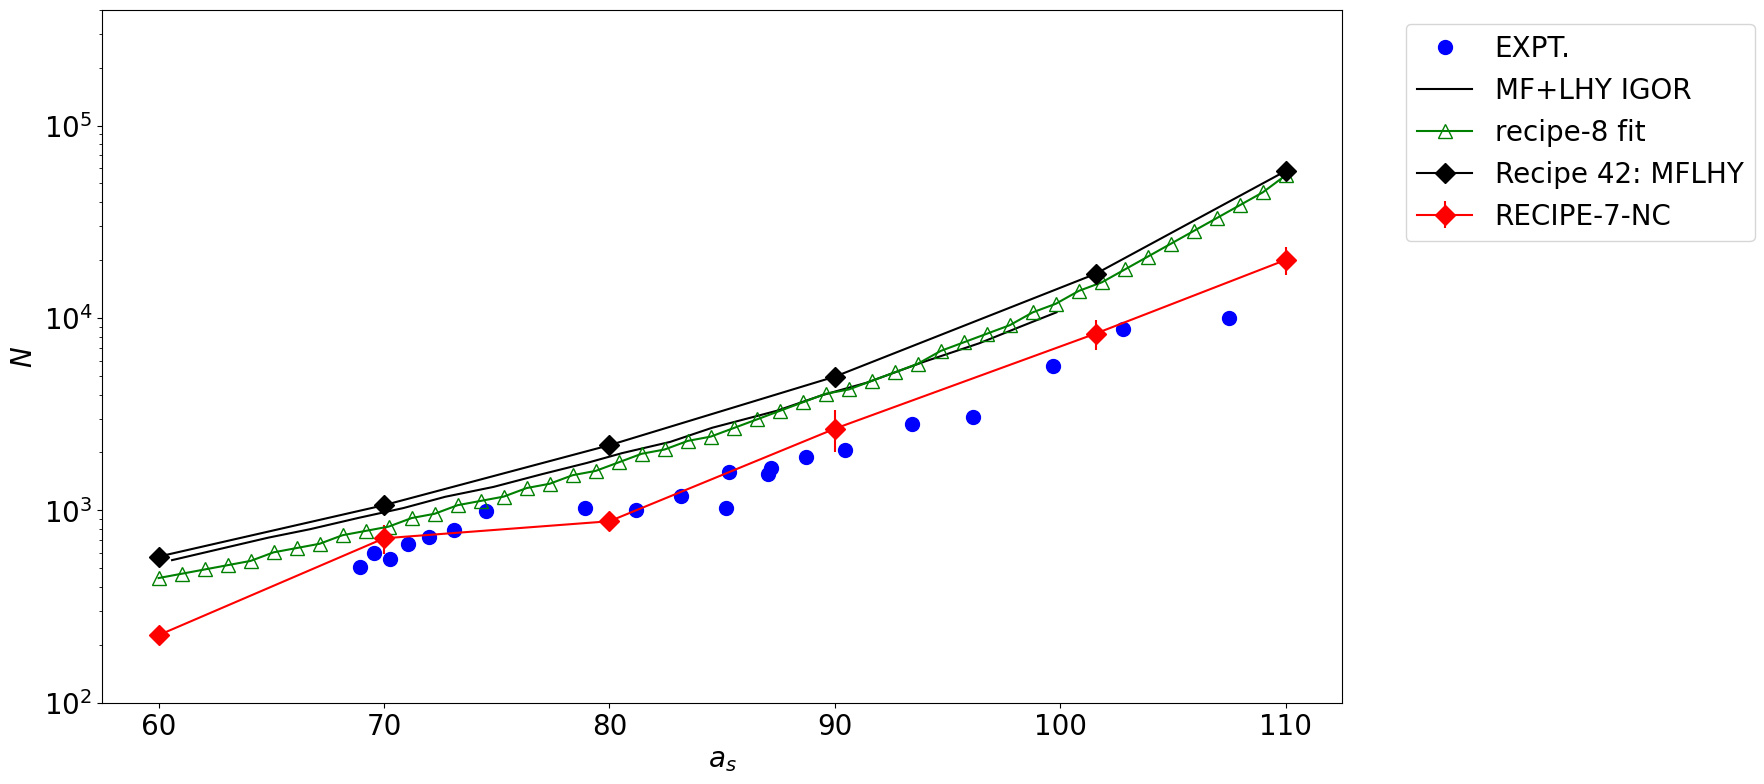

In [9]:

plt.figure(figsize=(16, 9))

def log_func_fit(x, a, b, c):
    return a*x**2 + b*x + c
def func_fit(x, a, b, c):
    return np.exp(log_func_fit(x, a, b, c))
data = np.loadtxt("./experimental-data/combined-critical-atom-number.dat")
sclen_expt = data[:,0]
nc_expt = data[:,1]
popt, pcov = curve_fit(f=log_func_fit, xdata=sclen_expt, ydata=np.log(nc_expt))

plt.plot(sclen_expt, nc_expt, label="EXPT.", ls='', marker='o', color='blue', markersize=10)


mf_data = np.loadtxt("./experimental-data/mean_field_IGOR.dat")
sclen_mf = mf_data[:,0]
nc_mf = mf_data[:,1]
plt.plot(sclen_mf, nc_mf, label="MF+LHY IGOR", color='black', markersize=10)

# load data from file ./results/critical-atom-numbers/recipe-7-nc/functionals_E_N_average_std.dat and plot it
data = np.loadtxt("./results/critical-atom-numbers/recipe-7-nc/functionals_E_N_average_std.dat")
sclen = data[:,0]
nc = data[:,1]
nc_std = data[:,2]
plt.errorbar(sclen, nc, yerr=nc_std, label="RECIPE-7-NC", color='red', ls='-', marker='D', markersize=10)




# same, but for recipe 8
data = np.loadtxt("./results/critical-atom-numbers/recipe-8-nc/functionals_E_N_average_std.dat")
sclen = data[:,0]
nc = data[:,1]
nc_std = data[:,2]
# plot the green error bars, but with the line, with non filled markers
# plt.errorbar(sclen, nc, yerr=nc_std, label="RECIPE-8-NC", color='green', ls='-', marker='^', markersize=10, markerfacecolor='none')


plt.plot(a_s, n_c_best_possible_fit, label="recipe-8 fit", color='green', ls='-', marker='^', markersize=10, markerfacecolor='none')

# Open the output file for writing
# data = np.loadtxt("results/critical-atom-numbers/recipe-7-nc/functionals_E_N_2nd_approach.dat")
# # the header is as follows: a_s <n_c>  err(n_c)  <beta>  err(beta) <gamma>  \n"). Read the data and plot
# sclen = data[:,0]
# nc = data[:,1]
# nc_std = data[:,2]
# plt.errorbar(sclen, nc, yerr=nc_std, label="RECIPE-7-NC-2ND-APPROACH", color='green', ls='-', marker='o', markersize=10)

data = np.loadtxt("./results/critical-atom-numbers/recipe-42-nc/functionals_E_N.dat")
sclen = data[:,0]
nc = data[:,1]
plt.plot(sclen, nc, label="Recipe 42: MFLHY", color='black', marker='D', ls='-', markersize=10)


plt.xlabel(r'$a_s$', fontsize=20)
plt.ylabel(r'$N$', fontsize=20)
plt.legend(loc = "best", bbox_to_anchor=(1.04, 1), fontsize=20)


plt.yscale('log')
plt.ylim(100, 400000)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Save the figure into plots folder
plt.savefig(f"plots/critical-atom-number.pdf", bbox_inches='tight', dpi=300)
plt.savefig(f"plots/critical-atom-number.png", bbox_inches='tight', dpi=300)
